In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

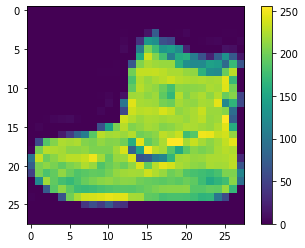

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

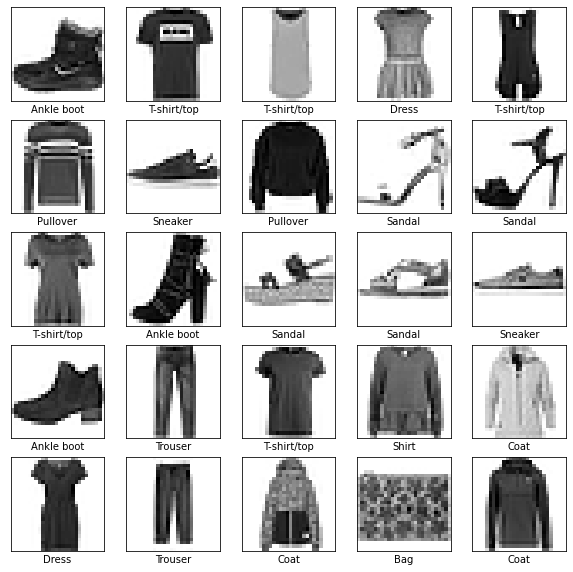

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4985 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3158 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)
print('\ntest_accuracy',test_acc)

313/313 - 1s - loss: 0.3325 - accuracy: 0.8824 - 518ms/epoch - 2ms/step

test_accuracy 0.8823999762535095


In [12]:
probability_model= tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
prediction_model= probability_model.predict(test_images)

In [14]:
prediction_model[:5]

array([[1.06660536e-06, 4.21420303e-08, 9.29277917e-08, 3.14452251e-07,
        1.91836858e-08, 2.81748502e-03, 4.22242778e-07, 2.04330869e-02,
        5.70092254e-07, 9.76746917e-01],
       [1.05416484e-05, 1.61358082e-16, 9.99505997e-01, 5.43748935e-11,
        1.78930102e-04, 5.68429716e-14, 3.04575369e-04, 3.64801275e-17,
        3.95265015e-10, 2.78137985e-15],
       [3.16551798e-08, 9.99999881e-01, 3.67874758e-11, 6.45067644e-08,
        1.42793699e-09, 1.32216735e-18, 4.81446411e-11, 1.17636707e-20,
        1.51137974e-11, 1.78117937e-12],
       [1.29622153e-08, 9.99997139e-01, 1.40873968e-09, 2.84579096e-06,
        1.24708188e-09, 3.15209996e-14, 2.84219426e-10, 4.15927789e-19,
        3.64147037e-12, 7.64733762e-12],
       [1.20678276e-01, 4.05999913e-07, 4.96475399e-02, 1.38702407e-03,
        7.33498251e-03, 8.02836695e-08, 8.20925772e-01, 1.24950972e-07,
        2.47299376e-05, 9.80911864e-07]], dtype=float32)

In [15]:
np.argmax(prediction_model[0])

9

In [27]:
def plot_img(i, prediction_array, true_label, img):
  true_label, img=true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])


  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label= np.argmax(prediction_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, prediction_array, true_label):
  true_label= true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  
  this_plot= plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0,1])
  predicted_label= np.argmax(prediction_array)

  this_plot[predicted_label].set_color("red")
  this_plot[true_label].set_color("blue")
  


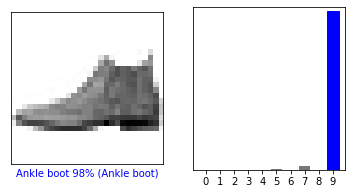

In [28]:
i=0
plt.figure(figsize= (6,3))
plt.subplot(1,2,1)
plot_img(i,prediction_model[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction_model[i],test_labels)
plt.show()

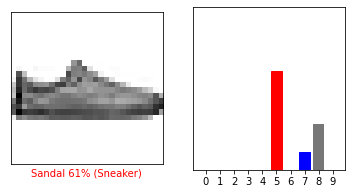

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i, prediction_model[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction_model[i],  test_labels)
plt.show()

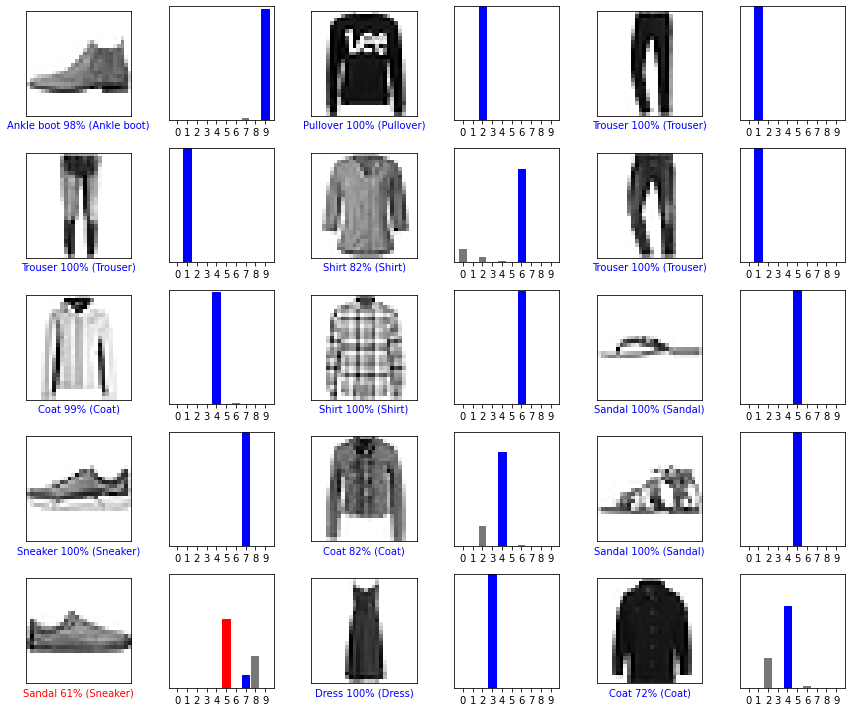

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img(i, prediction_model[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction_model[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0541658e-05 1.6135808e-16 9.9950600e-01 5.4375102e-11 1.7892977e-04
  5.6842863e-14 3.0457595e-04 3.6480266e-17 3.9526579e-10 2.7813587e-15]]


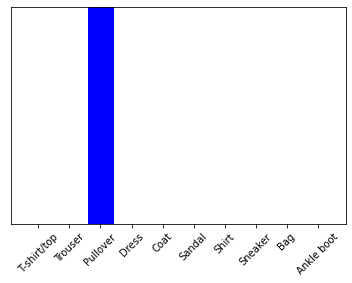

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [35]:
np.argmax(predictions_single[0])

2